## Supplementary Matterials - LB1 project - 2023

In [1]:
less rcsb_report.csv

Once I downloaded the costum report file from PDB, I can clean it with this command run in linux terminal and save the pdb idies in "pdbe_list" text file:

## 1. structure selection

In [3]:
%%bash
tail -n +3 rcsb_report.csv |grep -v "^,," |cut -d "," -f 2,3 |tr -d \"|tr "," ":">pdbe_list.txt
    
#we start from line 3 because as can be checked with less command the 
#-2 first line are descriptions.
#The grep -v "^,," command excludes all the lines starting with ,, 
#The cut -d "," -f 2,3 command indicates that in the file which
# -columns are separated by , cut out the 2nd and 3th column out
#The first tr command delets any occurrences of the backslash character \. 
#The second tr command replaces , with  :


In [4]:
%%bash
less pdbe_list.txt |wc

     27      27     189


## 2. Multiple Structure Alignment

In order to do multiple structure Alignment with PDBeFold web tool, we upluad the pdbe_list obtained above in the website: https://www.ebi.ac.uk/msd-srv/ssm/

The output of the MSA done by PDBeFold can be downloaded as a fasta file

In [6]:
%%bash
#to visualize better the alignment from fasta file
grep . fasta.seq  |awk '{if  (substr($1,1,1)==">") {printf "\n%s ",$1} else {printf"%s",$0}}' 


>PDB:1aap:A --------------------vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGgCGG-NRNNFDTEEYCMAVCg---
>PDB:1bun:B ------------------rkrhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYG-GCNgNGNHFKSDHLCRCECleyr
>PDB:1dtx:A ------------------eprrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSgCGG-NSNRFKTIEECRRTCig--
>PDB:1fak:I --------------------apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGgCLA-KRNNFESAEDCMRTC----
>PDB:1g6x:A --------------------rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGgCRA-KRNNFKSAEDCLRTCgga-
>PDB:1kth:A --------------------etdicklpkdegtcrDFILKWYYDPNTKSCARFWYGgCGG-NENKFGSQKECEKVCapv-
>PDB:1t7c:B --------------------rpdfcleppytgpceARIIRYFYNAKAGLCQTFVYGgCRA-KRNNFKSAEDCLRTCgga-
>PDB:1yc0:I ------------qhqhqmhqtedyclasnkvgrcrGSFPRWYYDPTEQICKSFVYGgCLG-NKNNYLREEECILACrgv-
>PDB:1zr0:B ----------------ptgnnaeicllpldygpcrALLLRYYYDRYTQSCRQFLYGgCEG-NANNFYTWEACDDACwrie
>PDB:2zjx:A --------------------rpdfcleppytgpgkARIIRYFYNAKAGLAQTFVYGgARA-KRNNFKSAEDALRTCgga-
>PDB:3byb:A ------------------kdrpdfcelpadtgpcrVRFPSFYYNPDEKKCLEFIYGg

In [7]:
%%bash
#to clean up a bit for example we can remove the first 20 ‘-’:  
grep . fasta.seq |awk '{if (substr($1,1,1)==">") {printf "\n%s ",$1} else {printf "%s",$0}}' |awk '{print $1;print substr($2,20,58)}' |less




>PDB:1aap:A
-vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGgCGG-NRNNFDTEEYCMAVCg
>PDB:1bun:B
krhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYG-GCNgNGNHFKSDHLCRCECl
>PDB:1dtx:A
prrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSgCGG-NSNRFKTIEECRRTCi
>PDB:1fak:I
-apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGgCLA-KRNNFESAEDCMRTC-
>PDB:1g6x:A
-rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGgCRA-KRNNFKSAEDCLRTCg
>PDB:1kth:A
-etdicklpkdegtcrDFILKWYYDPNTKSCARFWYGgCGG-NENKFGSQKECEKVCa
>PDB:1t7c:B
-rpdfcleppytgpceARIIRYFYNAKAGLCQTFVYGgCRA-KRNNFKSAEDCLRTCg
>PDB:1yc0:I
qtedyclasnkvgrcrGSFPRWYYDPTEQICKSFVYGgCLG-NKNNYLREEECILACr
>PDB:1zr0:B
nnaeicllpldygpcrALLLRYYYDRYTQSCRQFLYGgCEG-NANNFYTWEACDDACw
>PDB:2zjx:A
-rpdfcleppytgpgkARIIRYFYNAKAGLAQTFVYGgARA-KRNNFKSAEDALRTCg
>PDB:3byb:A
drpdfcelpadtgpcrVRFPSFYYNPDEKKCLEFIYGgCEG-NANNFITKEECESTCa
>PDB:3m7q:B
aeasicsepkkvgrckGYFPRFYFDSETGKCTPFIYGgCGG-NGNNFETLHQCRAICr
>PDB:3wny:A
-rpafcleppyagpgkARIIRYFYNAKAGAAQAFVYGgVRA-KRNNFASAADALAACa
>PDB:4bqd:A
lmhsfcafkaddgpckAIMKRFFFNIFTRQCEEFIYGgCEG-NQNRFESLEECKKMCt
>PDB

In [8]:
%%bash
#some sequences such as for PDB:5nx1:D are shorter than others so we can exclude them
grep . fasta.seq  | awk '{if (substr($1,1,1)==">") {printf "\n%s ", $1} else {printf "%s",$0}}' | awk '{print $1;print toupper(substr($2,20,58))}' | awk '/^>/{p=1} /5nx1/{p=0} p'|tail -n +3 >ali_3d_clean.fasta


In [9]:
%%bash 
less ali_3d_clean.fasta

>PDB:1bun:B
KRHPDCDKPPDTKICQTVVRAFYYKPSAKRCVQFRYG-GCNGNGNHFKSDHLCRCECL
>PDB:1dtx:A
PRRKLCILHRNPGRCYDKIPAFYYNQKKKQCERFDWSGCGG-NSNRFKTIEECRRTCI
>PDB:1fak:I
-APDFCLEPPYDGPCRALHLRYFYNAKAGLCQTFYYGGCLA-KRNNFESAEDCMRTC-
>PDB:1g6x:A
-RPDFCLEPPYAGACRARIIRYFYNAKAGLCQTFVYGGCRA-KRNNFKSAEDCLRTCG
>PDB:1kth:A
-ETDICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGG-NENKFGSQKECEKVCA
>PDB:1t7c:B
-RPDFCLEPPYTGPCEARIIRYFYNAKAGLCQTFVYGGCRA-KRNNFKSAEDCLRTCG
>PDB:1yc0:I
QTEDYCLASNKVGRCRGSFPRWYYDPTEQICKSFVYGGCLG-NKNNYLREEECILACR
>PDB:1zr0:B
NNAEICLLPLDYGPCRALLLRYYYDRYTQSCRQFLYGGCEG-NANNFYTWEACDDACW
>PDB:2zjx:A
-RPDFCLEPPYTGPGKARIIRYFYNAKAGLAQTFVYGGARA-KRNNFKSAEDALRTCG
>PDB:3byb:A
DRPDFCELPADTGPCRVRFPSFYYNPDEKKCLEFIYGGCEG-NANNFITKEECESTCA
>PDB:3m7q:B
AEASICSEPKKVGRCKGYFPRFYFDSETGKCTPFIYGGCGG-NGNNFETLHQCRAICR
>PDB:3wny:A
-RPAFCLEPPYAGPGKARIIRYFYNAKAGAAQAFVYGGVRA-KRNNFASAADALAACA
>PDB:4bqd:A
LMHSFCAFKADDGPCKAIMKRFFFNIFTRQCEEFIYGGCEG-NQNRFESLEECKKMCT
>PDB:4dtg:K
EKPDFCFLEEDPGICRGYITRYFYNNQTKQCERFKYGGCLG-NMNNFETLEECKNICE
>PDB:4

## 3. Generation of HMM

Now that we have a cleaned alingment fasta file, we are ready to generate HMM

In [10]:
%%bash
# to build hmm from fasta
hmmbuild ali_3d_clean.hmm ali_3d_clean.fasta 

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             ali_3d_clean.fasta
# output HMM file:                  ali_3d_clean.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     ali_3d_clean            25    58    57     2.52  0.977 

# CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00.05


In [11]:
%%bash
less ali_3d_clean.hmm

HMMER3/f [3.3.2 | Nov 2020]
NAME  ali_3d_clean
LENG  57
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Tue May 30 16:38:40 2023
NSEQ  25
EFFN  2.517700
CKSUM 2426223366
STATS LOCAL MSV       -8.9462  0.71902
STATS LOCAL VITERBI   -9.1515  0.71902
STATS LOCAL FORWARD   -3.9663  0.71902
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.60672  2.67555  3.09092  2.67314  2.78078  2.67418  3.82563  3.44774  2.60333  3.05677  4.12164  2.71447  3.48999  3.06085  2.83616  2.78339  2.95321  3.24228  4.62495  2.88453
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.39431  4.79254  1.14707  0.61958  0.77255  0.0

          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.01239  4.79254  5.51489  0.61958  0.77255  0.48576  0.95510
     17   1.50884  5.16208  2.60085  2.58432  4.50528  2.62726  3.83643  3.95433  2.18152  3.49904  4.27500  3.11564  4.00884  2.95783  3.08587  2.81261  2.68951  3.28474  5.68402  4.31019     17 a - - -
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.01239  4.79254  5.51489  0.61958  0.77255  0.48576  0.95510
     18   2.46551  3.36252  3.98446  3.40818  2.31695  3.85531  4.13582  2.66789  2.94486  2.31017  3.48659  3.72058  4.22917  3.13930  2.64048  2.39449  3.03745  2.36774  4.97659  3.03857     18 l - - -
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.7249

          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.01239  4.79254  5.51489  0.61958  0.77255  0.48576  0.95510
     35   2.80720  3.31407  3.11806  3.68558  2.83556  3.91002  4.21298  2.32501  3.16572  2.16498  3.39803  3.89216  3.45417  3.78480  3.07443  3.19591  2.61543  1.82174  3.82380  3.39176     35 v - - -
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.01239  4.79254  5.51489  0.61958  0.77255  0.48576  0.95510
     36   4.92483  5.80596  5.70000  5.66547  2.05158  5.35463  3.94322  4.49517  5.43052  3.61629  5.00126  4.86226  5.59962  5.04642  5.20637  4.76480  5.11016  4.45014  2.96331  0.38583     36 Y - - -
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.7249

          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.01239  4.79254  5.51489  0.61958  0.77255  0.48576  0.95510
     53   2.62881  5.15239  2.86454  2.32109  4.43848  3.59865  3.79197  3.22091  2.22178  2.47793  3.40810  2.70834  3.99031  2.91208  1.94439  2.79428  3.03003  3.51091  5.62152  4.25072     54 r - - -
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.01239  4.79254  5.51489  0.61958  0.77255  0.48576  0.95510
     54   2.30099  3.70801  2.83501  2.34758  4.55920  3.58339  3.77216  4.02538  1.99184  3.02852  4.28907  2.83687  3.97618  2.87832  1.91786  2.64951  3.03072  3.61712  5.68910  4.29691     55 r - - -
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.7249

## 4. Selection of Training and Test sets

The psitive and negative sets can be downloaded from swissprot with being pfam as positive and NOT pfam as negative

In [13]:
%%bash 
less positive.list |wc

    390     390    2754


In [15]:
%%bash
grep ">" negative.fasta| wc

 569126 8299299 73571394


In [16]:
%%bash
#which are the proteins already been used in training-set? We have the pdb_IDs of them!
cut -b 1-4 pdbe_list.txt >pdb-IDs.txt
less pdb-IDs.txt |wc

     27      27     135


 
but positive.list has a list of uniprot-IDs so to remove the pdb-IDs of training set from the positive set we need to extract also their uniprot_IDs >> we can do so by ID Mapping on Uniprot and this is the result list of proteins to be removed from the positive set


In [18]:
%%bash
less to_be_removed.list 

P05067
P00617
P00989
P00980
P08709
P13726
P00974
P00974
P12111
P00766
P00974
O43278
Q04756
P48307
P00760
P00974
Q90WA1
P31713
P00760
P00974
P10646
P10646
O43278
Q9Y5Y6
G9I929
G9I930
Q1XA76
P02760
P35030
O43291
P35030
P00974
A0A1Z0YU59
Q92876
P81658
P10646
P35030
H7C0V9
Q8N2U3
P0C1X2
P0C1X2


In [19]:
%%bash
#to remove the list of ids (to_be_removed.list) from the positive dataset 
comm -23 <(sort positive.list) <(sort to_be_removed.list) > not_redundant.txt
less not_redundant.txt | wc

    374     374    2638


as we need fasta format file for the HMM, with the list of not redundant proteins obtained above, again ID Mapping on uniprot performed but this time from uniprot ID also to Uniprot ID !


In [21]:
%%bash
grep ">" Positive_Kunitz.fasta |wc

    374    3745   38730


## 5. Method Optimization and assesment

## hmmsearch program of HMMER

In [22]:
%%bash
#hmmsearch command matching the model ali_3d.hmm with sequence in Psoitive_kunitz.fasta
# --noali excludes from the output the alignments
# -Z normalizes the e-value output
hmmsearch --max --noali -o output.search -Z 1 ali_3d_clean.hmm Positive_Kunitz.fasta
less output.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        Positive_Kunitz.fasta
# output directed to file:         output.search
# show alignments in output:       no
# Max sensitivity mode:            on [all heuristic filters off]
# sequence search space set to:    1
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                  Description
    ------- ------ -----    ------- ------ -----   ---- --  --------                  

      1e-29   88.8   6.3    1.1e-29   88.8   6.3    1.0  1  sp|Q7LZE3|VKTHE_DENAN      Kunitz-type serine protease inhibi
    1.1e-29   88.8   5.6    1.2e-29   88.6   5.6    1.0  1  sp|B7S4N9|VKT_OXYSC        Kunitz-type serine protease inhibi
    1.1e-29   88.8   4.5    1.2e-29   88.7   4.5    1.0  1  sp|C0HK74|3CPI_HETMG       PI-stichotoxin-Hmg3c OS=Heteractis
    1.1e-29   88.8   4.4    1.2e-29   88.7   4.4    1.0  1  sp|P00985|VKT2_HEMHA       Kunitz-type serine protease inhibi
    1.1e-29   88.7   6.5    1.3e-29   88.5   6.5    1.0  1  sp|Q9TWG0|VKT1_ANESU       KappaPI-actitoxin-Avd3b OS=Anemoni
    1.4e-29   88.4   7.9    1.6e-29   88.3   7.9    1.0  1  sp|P10280|VKT52_ANESU      KappaPI-actitoxin-Avd3a OS=Anemoni
    1.5e-29   88.3   4.8    1.8e-29   88.1   4.8    1.0  1  sp|Q6ITB7|VKT1_OXYSC       Kunitz-type serine protease inhibi
    1.6e-29   88.3   6.6    1.8e-29   88.1   6.6    1.0  1  sp|Q2ES47|VKT4_DABRR       Kunitz-type serine protease inhibi
    1.6e-29   88.2   6.8

    2.3e-28   84.5   3.7    2.7e-28   84.3   3.7    1.0  1  sp|Q6ITB3|VKT1_NOTSC       Kunitz-type serine protease inhibi
    2.4e-28   84.5   3.7    2.7e-28   84.3   3.7    1.0  1  sp|B5KL33|VKT2_TROCA       Kunitz-type serine protease inhibi
    2.7e-28   84.3   7.0    2.7e-28   84.3   7.0    1.9  1  sp|A0A6B7FBD3|VKT2I_HETCR  PI-stichotoxin-Hcr2i OS=Heteractis
    2.8e-28   84.3   7.8    3.1e-28   84.1   7.8    1.0  1  sp|P81547|VKT1_ANTAF       PI-actitoxin-Axm2a OS=Anthopleura 
    2.8e-28   84.2   8.1    3.3e-28   84.0   8.1    1.1  1  sp|P0DN19|VKTF_ANEVI       U-actitoxin-Avd3r (Fragment) OS=An
      3e-28   84.2   6.1    3.5e-28   84.0   6.1    1.0  1  sp|A6MFL1|VKT1_DEMVE       Kunitz-type serine protease inhibi
    3.1e-28   84.1   7.1    3.5e-28   83.9   7.1    1.0  1  sp|B5L5R1|IVBI5_PSEPO      Blackelin-5 OS=Pseudechis porphyri
    3.1e-28   84.1   6.4    3.6e-28   83.9   6.4    1.0  1  sp|Q6ITC1|VKTH1_PSEAU      Kunitz-type serine protease inhibi
    3.2e-28   84.1   6.5

      1e-26   79.3   6.7    1.2e-26   79.1   6.7    1.0  1  sp|A8Y7N5|VKTC2_DABSI      Kunitz-type serine protease inhibi
      1e-26   79.3   8.9    1.1e-26   79.1   8.9    1.0  1  sp|C8YJ95|KUN3_TABYA       Tabkunin 2 OS=Tabanus yao OX=48557
    1.1e-26   79.2   7.9    1.1e-26   79.1   7.9    1.0  1  sp|P0DMJ3|VKTI1_ANTFU      PI-actitoxin-Afv2a OS=Anthopleura 
    1.2e-26   79.1  11.4    1.3e-26   78.9  11.4    1.1  1  sp|A7X3V4|VKT1_TELDH       Kunitz-type serine protease inhibi
    1.3e-26   78.9   7.6    1.4e-26   78.8   7.6    1.0  1  sp|P20229|VKTTI_NAJNA      Kunitz-type serine protease inhibi
    1.5e-26   78.7   7.1    1.7e-26   78.5   7.1    1.0  1  sp|A8Y7P1|VKTB1_DABSI      Kunitz-type serine protease inhibi
    1.6e-26   78.7   8.8    1.7e-26   78.5   8.8    1.0  1  sp|P00990|VKT2_DABSI       Kunitz-type serine protease inhibi
    1.6e-26   78.6   9.0      2e-26   78.3   9.0    1.1  1  sp|P0DN18|VKTE_ANEVI       U-actitoxin-Avd3q OS=Anemonia viri
    1.7e-26   78.6  12.1

    1.4e-24   72.4  11.9    1.6e-24   72.3  11.9    1.0  1  sp|Q0PL65|VKTH7_BUNMU      Kunitz-type serine protease inhibi
    1.6e-24   72.2   8.2    1.8e-24   72.1   8.2    1.1  1  sp|P0DJ48|VKT23_LYCMC      Kunitz-type serine protease inhibi
    1.6e-24   72.2   9.0    3.1e-24   71.3   9.0    1.5  1  sp|P86959|KCP1_PINMA       BPTI/Kunitz domain-containing prot
    1.8e-24   72.1  23.5    2.1e-14   39.8   8.0    2.3  2  sp|P86964|KCP3_PINMA       BPTI/Kunitz domain-containing prot
    1.8e-24   72.1   9.4    1.8e-24   72.1   9.4    1.8  1  sp|Q9DA01|EPPI_MOUSE       Eppin OS=Mus musculus OX=10090 GN=
    2.3e-24   71.8   5.6    2.3e-24   71.8   5.6    2.9  1  sp|Q4KUS1|WFDC8_MOUSE      WAP four-disulfide core domain pro
    2.5e-24   71.6   4.6    3.6e-24   71.1   4.6    1.2  1  sp|Q29143|ELAC_TRIVU       Early lactation protein OS=Trichos
      3e-24   71.4   5.9    3.2e-24   71.3   5.9    1.0  1  sp|D2Y490|VKT1C_CONCL      Kunitz-type serine protease inhibi
    3.4e-24   71.2   9.6

    1.9e-20   59.2   3.3    2.3e-20   58.9   3.3    1.1  1  sp|D2Y2F8|VKTG1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    1.9e-20   59.2   4.5    2.2e-20   59.0   4.5    1.1  1  sp|P0DJ69|VKT52_CYRHA      Kunitz-type serine protease inhibi
    1.9e-20   59.2   4.5    2.2e-20   59.0   4.5    1.1  1  sp|P0DJ74|VKT76_CYRHA      Kunitz-type serine protease inhibi
      2e-20   59.1   3.5    2.4e-20   58.8   3.5    1.1  1  sp|D2Y2F6|VKTE1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
      2e-20   59.1   3.5    2.4e-20   58.8   3.5    1.1  1  sp|P0DJ72|VKT68_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    2.2e-20   59.0   4.3    2.7e-20   58.7   4.3    1.1  1  sp|D2Y2F5|VKT4_CYRHA       Kunitz-type U15-theraphotoxin-Hhn1
    2.2e-20   59.0   4.3    2.7e-20   58.7   4.3    1.1  1  sp|P0DJ71|VKT35_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    2.2e-20   59.0   3.9    2.7e-20   58.7   3.9    1.1  1  sp|D2Y2Q6|VKTO1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    2.7e-20   58.7   1.7


>> sp|A0A6P8HC43|ATPI1_ACTTE  Actinia tenebrosa protease inhibitors OS=Actinia tenebrosa OX=6105 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   70.8  13.5   1.7e-21   4.7e-24       2      56 ..      24      78 ..      23      79 .. 0.97
   2 !   81.4  10.9   8.1e-25   2.2e-27       3      57 .]      88     142 ..      86     142 .. 0.97
   3 !   84.9   9.7   6.8e-26   1.8e-28       3      57 .]     158     212 ..     156     212 .. 0.97
   4 !   85.1  10.6   5.9e-26   1.6e-28       3      57 .]     228     282 ..     226     282 .. 0.97

>> sp|Q28864|TFPI1_MACMU  Tissue factor pathway inhibitor OS=Macaca mulatta OX=9544 GN=TFPI PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- ------- 

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   73.1   6.4   3.2e-22   8.6e-25       3      56 ..      25      78 ..      24      79 .. 0.97
   2 !   80.5   6.8   1.6e-24   4.3e-27       4      57 .]     104     157 ..     102     157 .. 0.98

>> sp|Q8WPI3|KUNIG_RHIMP  Boophilin-G2 OS=Rhipicephalus microplus OX=6941 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   82.9   7.9   2.9e-25   7.7e-28       2      56 ..      17      71 ..      16      72 .. 0.97
   2 !   69.8   7.5   3.4e-21   9.1e-24       6      56 ..      89     139 ..      85     140 .. 0.96

>> sp|B6ZIW0|KUN_HAELO  Thrombin inhibitor hemalin OS=Haemaphysalis longicornis OX=44386 PE=2 SV=1

   1 !   59.1   9.0   7.8e-18   2.1e-20       3      56 ..       7      59 ..       5      60 .. 0.94
   2 !   68.2   3.6   1.1e-20   2.9e-23       3      56 ..      67     120 ..      65     121 .] 0.96

>> sp|Q08E66|WFKN2_BOVIN  WAP, Kazal, immunoglobulin, Kunitz and NTR domain-containing protein 2 OS=Bos taurus OX=9913 G
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   52.4   4.7   9.5e-16   2.5e-18       5      56 ..     325     376 ..     322     377 .. 0.96
   2 !   80.1   3.9   2.1e-24   5.7e-27       4      56 ..     382     434 ..     380     435 .. 0.98

>> sp|Q7TQN3|WFKN2_MOUSE  WAP, Kazal, immunoglobulin, Kunitz and NTR domain-containing protein 2 OS=Mus musculus OX=1009
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- --

   1 !   89.6   9.5   2.3e-27     6e-30       2      56 ..      27      81 ..      26      82 .. 0.98

>> sp|B5KL39|VKT2_AUSSU  Kunitz-type serine protease inhibitor superbin-2 OS=Austrelaps superbus OX=29156 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   89.5   5.6   2.4e-27   6.5e-30       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|P04815|BPT2_BOVIN  Spleen trypsin inhibitor I OS=Bos taurus OX=9913 PE=1 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   88.9   8.5   3.6e-27   9.7e-30       1      56 [.      35      90 ..      35      91 .. 0.98

>> sp|F8J2F3|VKT28_DRYCN  Kunitz-type serine protease inhibitor 28 OS=Drysdalia cor

   1 !   88.1   4.0   6.6e-27   1.8e-29       5      57 .]       3      55 ..       1      55 [. 0.97

>> sp|P0DN06|VKT1A_ANEVI  U-actitoxin-Avd3f OS=Anemonia viridis OX=51769 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   87.9   5.6   7.7e-27   2.1e-29       4      56 ..      19      71 ..      17      72 .. 0.97

>> sp|C0HLB2|VKT_PSEPC  Kunitz-type serine protease inhibitor PPTI OS=Pseudocerastes persicus OX=47769 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   87.9   7.3   7.9e-27   2.1e-29       2      56 ..       3      57 ..       2      58 .. 0.98

>> sp|P0DV04|VKT2N_HETCR  PI-stichotoxin-Hcr2n OS=Heteractis crispa OX=175771 PE=3 SV=1

   1 !   86.5   4.6   2.1e-26   5.6e-29       2      56 ..       1      55 [.       1      56 [. 0.98

>> sp|P0DN11|VKT7_ANEVI  U-actitoxin-Avd3j OS=Anemonia viridis OX=51769 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   86.3   6.8   2.5e-26   6.6e-29       5      56 ..      20      71 ..      18      72 .. 0.97

>> sp|B5KL37|VKT6_CRYNI  Kunitz-type serine protease inhibitor nigrescinin-6 OS=Cryptophis nigrescens OX=292442 PE=2 SV=
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   86.4   7.9   2.3e-26     6e-29       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|Q6ITC0|VKT2_PSEAU  Kunitz-type serine protease inhibitor mulgin-2 OS=Pseud


>> sp|P00993|IBP_CARCR  Chelonianin OS=Caretta caretta OX=8467 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   85.2   5.9   5.5e-26   1.5e-28       2      57 .]       4      59 ..       3      59 .. 0.97

>> sp|B5L5R4|IVBI4_NOTSC  Tigerin-4 OS=Notechis scutatus scutatus OX=70142 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   85.0   4.9   6.3e-26   1.7e-28       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|P00981|VKTHK_DENPO  Kunitz-type serine protease inhibitor homolog dendrotoxin K (Fragment) OS=Dendroaspis polylepi
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---


>> sp|P81547|VKT1_ANTAF  PI-actitoxin-Axm2a OS=Anthopleura aff. xanthogrammica OX=152178 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   84.1   7.8   1.2e-25   3.1e-28       4      57 .]       5      58 .]       3      58 .] 0.97

>> sp|P0DN19|VKTF_ANEVI  U-actitoxin-Avd3r (Fragment) OS=Anemonia viridis OX=51769 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   84.0   8.1   1.2e-25   3.3e-28       4      56 ..       9      61 ..       7      62 .. 0.97

>> sp|A6MFL1|VKT1_DEMVE  Kunitz-type serine protease inhibitor vestiginin-1 OS=Demansia vestigiata OX=412038 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   83.0   6.2   2.5e-25   6.8e-28       2      57 .]      27      82 ..      26      82 .. 0.97

>> sp|P0DMJ2|VKT3C_ACTEQ  PI-actitoxin-Aeq3c OS=Actinia equina OX=6106 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   83.1   7.8   2.4e-25   6.4e-28       4      56 ..       5      57 .]       2      57 .] 0.97

>> sp|B5L5Q8|VKT5_PSEAU  Kunitz-type serine protease inhibitor mulgin-5 OS=Pseudechis australis OX=8670 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- ---

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   81.2   6.1   9.6e-25   2.6e-27       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|P0DKL8|VKT_VIPRE  Kunitz-type serine protease inhibitor Vur-KIn OS=Vipera renardi OX=927686 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   81.2   8.6   9.8e-25   2.6e-27       3      56 ..       4      57 ..       2      58 .. 0.97

>> sp|B1B5I8|VKT3_STIHA  KappaPI-stichotoxin-Shd2a OS=Stichodactyla haddoni OX=475174 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    --


>> sp|Q06481|APLP2_HUMAN  Amyloid beta precursor like protein 2 OS=Homo sapiens OX=9606 GN=APLP2 PE=1 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   79.6   3.5   3.1e-24   8.3e-27       4      56 ..     308     360 ..     305     361 .. 0.97

>> sp|H6VC06|VKTK2_DABRR  Kunitz-type serine protease inhibitor DrKIn-II OS=Daboia russelii OX=8707 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   79.4   6.8   3.5e-24   9.5e-27       2      56 ..      27      81 ..      26      82 .. 0.98

>> sp|P15943|APLP2_RAT  Amyloid beta precursor like protein 2 OS=Rattus norvegicus OX=10116 GN=Aplp2 PE=1 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to  


>> sp|P0DJ50|VKT31_MESMA  Kunitz-type serine protease inhibitor BmKTT-2 OS=Mesobuthus martensii OX=34649 PE=2 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   77.7  12.1   1.2e-23   3.2e-26       5      56 ..      25      76 ..      22      77 .. 0.97

>> sp|Q75S50|VKTH3_BUNCA  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin B3 chain OS=Bungarus candidus 
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   77.8   6.6   1.1e-23   2.9e-26       2      56 ..      27      81 ..      26      82 .. 0.97

>> sp|Q8AY44|VKTH7_BUNCA  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin B2b chain OS=Bungarus candidus
   #    score  bias  c-Evalu

   1 !   76.7   9.0   2.4e-23   6.3e-26       2      56 ..      27      81 ..      26      82 .. 0.98

>> sp|P81162|CRPTI_RHIMP  Protease inhibitor carrapatin OS=Rhipicephalus microplus OX=6941 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   76.7   6.3   2.5e-23   6.7e-26       5      57 .]       7      59 ..       4      59 .. 0.96

>> sp|Q3UW55|WFC6A_MOUSE  WAP four-disulfide core domain protein 6A OS=Mus musculus OX=10090 GN=Wfdc6a PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   76.9   0.4   2.2e-23   5.8e-26       2      56 ..      73     127 ..      72     128 .. 0.97

>> sp|A8Y7P3|VKTB3_DABSI  Kunitz-type serine protease inhibitor B3 OS

   1 !   73.8   9.9   1.9e-22   5.1e-25       4      57 .]      23      76 .]      20      76 .] 0.96

>> sp|P0DN15|VKTB_ANEVI  U-actitoxin-Avd3n OS=Anemonia viridis OX=51769 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   73.6  10.4   2.3e-22   6.1e-25       4      56 ..      19      71 ..      17      72 .. 0.97

>> sp|P0DJ45|VKT22_LYCMC  Kunitz-type serine protease inhibitor LmKTT-1b OS=Lychas mucronatus OX=172552 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   73.5   7.8   2.4e-22   6.4e-25       4      57 .]      23      76 ..      20      76 .. 0.96

>> sp|Q7T2Q6|VKTHB_BUNFL  Kunitz-type serine protease inhibitor homolog beta-bungarotox

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   71.1   4.6   1.3e-21   3.6e-24       3      57 .]      40      94 ..      39      94 .. 0.98

>> sp|D2Y490|VKT1C_CONCL  Kunitz-type serine protease inhibitor conotoxin Cal9.1c (Fragment) OS=Californiconus californi
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   71.3   5.9   1.2e-21   3.2e-24       2      57 .]       3      58 ..       2      58 .. 0.97

>> sp|H2A0M2|KCP1_PINMG  BPTI/Kunitz domain-containing protein 1 OS=Margaritifera margaritifera OX=102329 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- -------

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   67.0   7.9   2.6e-20   6.9e-23       4      57 .]      35      86 ..      32      86 .. 0.94

>> sp|P0DJ47|VKT12_MESMA  Kunitz-type serine protease inhibitor BmKTT-3 OS=Mesobuthus martensii OX=34649 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   66.6  11.6   3.5e-20   9.2e-23       6      57 .]       7      58 ..       4      58 .. 0.98

>> sp|P11424|IMAP_DROFU  Male accessory gland serine protease inhibitor OS=Drosophila funebris OX=7221 GN=PapD PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- 

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   63.2   9.7   3.9e-19   1.1e-21       1      56 [.      25      80 ..      25      81 .. 0.97

>> sp|Q8AY46|VKTHB_BUNCA  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin B1 chain OS=Bungarus candidus 
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   63.2   9.7   4.1e-19   1.1e-21       1      56 [.      26      81 ..      26      82 .. 0.97

>> sp|Q9EPX2|PPN_MOUSE  Papilin OS=Mus musculus OX=10090 GN=Papln PE=2 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   59.0   3.1   8.4e-18   2.2e-20       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|P0DJ67|VKT34_CYRHA  Kunitz-type U15-theraphotoxin-Hhn1c OS=Cyriopagopus hainanus OX=209901 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   59.0   3.1   8.4e-18   2.2e-20       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|D2Y2F8|VKTG1_CYRHA  Kunitz-type U15-theraphotoxin-Hhn1g OS=Cyriopagopus hainanus OX=209901 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- ---

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   56.1   3.6   6.3e-17   1.7e-19       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|P0DJ65|VKT7_CYRHA  Kunitz-type U15-theraphotoxin-Hhn1h OS=Cyriopagopus hainanus OX=209901 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   56.1   3.6   6.3e-17   1.7e-19       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|Q6UDR6|SPIT4_HUMAN  Kunitz-type protease inhibitor 4 OS=Homo sapiens OX=9606 GN=SPINT4 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- ------- 

   1 !   37.6   0.9   3.8e-11     1e-13       4      37 ..       2      33 .]       1      33 [] 0.94

>> sp|Q9BQY6|WFDC6_HUMAN  WAP four-disulfide core domain protein 6 OS=Homo sapiens OX=9606 GN=WFDC6 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   37.7   2.4   3.7e-11   9.9e-14      27      56 ..      98     127 ..      97     128 .. 0.96

>> sp|Q11101|YL15_CAEEL  BPTI/Kunitz inhibitor domain-containing protein C02F12.5 OS=Caenorhabditis elegans OX=6239 GN=C
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   24.7   8.7   4.2e-07   1.1e-09      17      56 ..      35      74 ..      18      75 .. 0.86

>> sp|P86963|KCP2_PINMA  BPTI/Kunitz domain-containi

To clean up the output a specific porsion of the file is selected from line 19 till 390

In [23]:
%%bash
head -n 392 output.search |tail -n +19 > kunitz_clean.out  
less kunitz_clean.out  

   8.6e-198  627.1 187.7    1.4e-22   66.0   6.7   14.5 12  sp|Q868Z9|PPN_DROME        Papilin OS=Drosophila melanogaster
   2.7e-181  574.3 156.8      1e-22   66.4   6.1   13.7 11  sp|O76840|PPN1_CAEEL       Papilin OS=Caenorhabditis elegans 
    1.7e-96  302.7  68.8    1.6e-28   85.1  10.6    4.1  4  sp|A0A6P8HC43|ATPI1_ACTTE  Actinia tenebrosa protease inhibit
    1.9e-71  222.5  41.6    1.1e-28   85.6   7.3    3.2  3  sp|Q28864|TFPI1_MACMU      Tissue factor pathway inhibitor OS
    6.7e-71  220.8  44.0    2.8e-27   81.1  11.3    3.2  3  sp|Q02445|TFPI1_RAT        Tissue factor pathway inhibitor OS
    2.4e-69  215.8  40.0    3.4e-27   80.8   6.6    3.1  3  sp|O54819|TFPI1_MOUSE      Tissue factor pathway inhibitor OS
    4.1e-68  211.8  37.9    1.2e-27   82.2   6.3    3.2  3  sp|P19761|TFPI1_RABIT      Tissue factor pathway inhibitor OS
    1.4e-67  210.1  37.9    8.1e-26   76.4   6.9    3.0  3  sp|P84875|PCPI_SABMA       Carboxypeptidase inhibitor SmCI OS
      2e-64  200.0  44.0

    1.7e-29   88.2   4.0    1.8e-29   88.1   4.0    1.0  1  sp|C0HJU7|VKT2G_HETCR      PI-stichotoxin-Hcr2g OS=Heteractis
    1.7e-29   88.2   4.0    1.8e-29   88.1   4.0    1.0  1  sp|C0HK72|3API_HETMG       PI-stichotoxin-Hmg3a OS=Heteractis
    1.7e-29   88.2   5.6    2.1e-29   87.9   5.6    1.1  1  sp|P0DN06|VKT1A_ANEVI      U-actitoxin-Avd3f OS=Anemonia viri
    1.9e-29   88.0   7.3    2.1e-29   87.9   7.3    1.0  1  sp|C0HLB2|VKT_PSEPC        Kunitz-type serine protease inhibi
      2e-29   88.0   5.6    2.1e-29   87.9   5.6    1.0  1  sp|P0DV04|VKT2N_HETCR      PI-stichotoxin-Hcr2n OS=Heteractis
      2e-29   88.0   4.5    2.5e-29   87.7   4.5    1.1  1  sp|P0DMJ5|VKT2E_HETCR      PI-stichotoxin-Hcr2e OS=Heteractis
    2.1e-29   87.9   6.7    2.5e-29   87.6   6.7    1.1  1  sp|Q2ES46|VKT5_DABRR       Kunitz-type serine protease inhibi
    2.5e-29   87.6   9.2    2.7e-29   87.5   9.2    1.0  1  sp|C0HLA7|MAMB4_DENVI      Mambaquaretin-4 OS=Dendroaspis vir
    2.5e-29   87.6   6.5

    3.9e-28   83.8   8.7    4.8e-28   83.5   8.7    1.1  1  sp|P0DN10|VKT6_ANEVI       U-actitoxin-Avd3i OS=Anemonia viri
    3.9e-28   83.8   5.4    4.9e-28   83.5   5.4    1.1  1  sp|B2G331|VKT2B_HETCR      TauPI-stichotoxin-Hcr2b OS=Heterac
    4.1e-28   83.7   5.0    4.6e-28   83.6   5.0    1.0  1  sp|A6MFL3|VKT3_DEMVE       Kunitz-type serine protease inhibi
    4.2e-28   83.7   5.7    4.8e-28   83.5   5.7    1.0  1  sp|E7FL12|VKT2_PSERS       Kunitz serine protease inhibitor P
    4.6e-28   83.6   5.7    5.3e-28   83.4   5.7    1.0  1  sp|B5KF94|VKT1_HOPST       Kunitz-type serine protease inhibi
    4.8e-28   83.5   7.8    5.2e-28   83.4   7.8    1.0  1  sp|C0HLA9|MAMB6_DENVI      Mambaquaretin-6 OS=Dendroaspis vir
    4.8e-28   83.5   6.1    5.1e-28   83.4   6.1    1.0  1  sp|P0DMJ4|VKTI3_ANTFU      PI-actitoxin-Afv2b OS=Anthopleura 
      5e-28   83.5   5.5    5.7e-28   83.3   5.5    1.0  1  sp|A6MGX9|VKT5_DEMVE       Kunitz-type serine protease inhibi
      5e-28   83.5   6.0

    1.7e-26   78.5   9.7      2e-26   78.4   9.7    1.0  1  sp|C1IBY4|KUN1_TABYA       Tabkunin 1 OS=Tabanus yao OX=48557
    1.8e-26   78.5   7.1    2.1e-26   78.2   7.1    1.1  1  sp|A8Y7P5|VKTB5_DABSI      Kunitz-type serine protease inhibi
    2.1e-26   78.3   4.7    2.4e-26   78.1   4.7    1.0  1  sp|B5KL27|VKT3_OXYMI       Kunitz-type serine protease inhibi
    2.2e-26   78.2   7.1    2.7e-26   77.9   7.1    1.1  1  sp|Q1RPT0|VKTH4_BUNMU      Kunitz-type serine protease inhibi
    2.3e-26   78.1   7.1    2.7e-26   77.9   7.1    1.0  1  sp|Q8AY45|VKBH2_BUNCA      Kunitz-type serine protease inhibi
    2.5e-26   78.0   6.9    2.9e-26   77.8   6.9    1.0  1  sp|A8Y7P4|VKTB4_DABSI      Kunitz-type serine protease inhibi
    2.5e-26   78.0  12.1    3.2e-26   77.7  12.1    1.1  1  sp|P0DJ50|VKT31_MESMA      Kunitz-type serine protease inhibi
    2.5e-26   78.0   6.6    2.9e-26   77.8   6.6    1.0  1  sp|Q75S50|VKTH3_BUNCA      Kunitz-type serine protease inhibi
    2.5e-26   78.0   6.6

    3.5e-24   71.1   8.9      4e-24   71.0   8.9    1.0  1  sp|C8YJ96|KUN4_TABYA       Tabkunin 4 OS=Tabanus yao OX=48557
    4.6e-24   70.8   2.0    5.2e-24   70.6   2.0    1.0  1  sp|B5L5Q6|VKT5_OXYMI       Kunitz-type serine protease inhibi
    4.8e-24   70.7   5.0    5.7e-24   70.5   5.0    1.1  1  sp|D2Y488|VKT1A_CONCL      Kunitz-type serine protease inhibi
    5.1e-24   70.6  10.7    5.5e-24   70.5  10.7    1.0  1  sp|P19859|VKTCI_NAJNA      Kunitz-type serine protease inhibi
    5.1e-24   70.6   7.3    5.8e-24   70.5   7.3    1.1  1  sp|P0DJ49|VKT24_MESMA      Kunitz-type serine protease inhibi
    5.2e-24   70.6  11.9    6.4e-24   70.3  11.9    1.1  1  sp|P0DN16|VKTC_ANEVI       U-actitoxin-Avd3o OS=Anemonia viri
    8.2e-24   70.0   7.7    8.7e-24   69.9   7.7    1.0  1  sp|P00983|MAMB7_DENPO      Mambaquaretin-7 OS=Dendroaspis pol
      9e-24   69.8   4.1    1.1e-23   69.6   4.1    1.1  1  sp|P0CY85|VKTB1_CONBU      Kunitz-type conkunitzin-B1 OS=Conu
    9.8e-24   69.7   5.9

    2.8e-20   58.6   6.3    5.3e-20   57.8   6.3    1.4  1  sp|Q2UY11|COSA1_MOUSE      Collagen alpha-1(XXVIII) chain OS=
    3.5e-20   58.4   4.1    4.2e-20   58.1   4.1    1.1  1  sp|B2ZBB9|VKTG6_CYRSC      Kunitz-type U15-theraphotoxin-Hs1b
    4.2e-20   58.1   3.1    5.2e-20   57.8   3.1    1.1  1  sp|D2Y2F3|VKT2_CYRHA       Kunitz-type U15-theraphotoxin-Hhn1
    4.2e-20   58.1   3.1    5.2e-20   57.8   3.1    1.1  1  sp|P0DJ64|VKT31_CYRHA      U15-Kunitz-type theraphotoxin-Hhn1
    4.4e-20   58.0   1.6    7.1e-20   57.4   1.6    1.3  1  sp|Q63870|CO7A1_MOUSE      Collagen alpha-1(VII) chain OS=Mus
    8.5e-20   57.1  10.5    9.3e-20   57.0  10.5    1.0  1  sp|C0HLB0|MAMB9_DENVI      Mambaquaretin-9 OS=Dendroaspis vir
    9.8e-20   56.9   4.5    1.3e-19   56.5   4.5    1.1  1  sp|D2Y2F7|VKTF1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    9.8e-20   56.9   4.5    1.3e-19   56.5   4.5    1.1  1  sp|P0DJ73|VKT74_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    9.8e-20   56.9   6.8

In [24]:
%%bash
#the same step before was done with the positive file with kunitz matches but 1 was set instead of 0:
awk '{split($9,a,"|"); print a[2],$4,1}' kunitz_clean.out > kunitz.class
less kunitz.class

Q868Z9 1.4e-22 1
O76840 1e-22 1
A0A6P8HC43 1.6e-28 1
Q28864 1.1e-28 1
Q02445 2.8e-27 1
O54819 3.4e-27 1
P19761 1.2e-27 1
P84875 8.1e-26 1
P83606 9.1e-25 1
Q03610 1.2e-20 1
Q7YRQ8 5.7e-29 1
O35536 4.7e-26 1
P86733 1.2e-27 1
Q6T269 3.3e-26 1
Q8WPI2 6.1e-28 1
W4VSH9 4.3e-27 1
Q8WPI3 7.7e-28 1
B6ZIW0 1.5e-28 1
Q9WU03 7.5e-27 1
P04365 4.4e-25 1
Q5VJG2 2.5e-25 1
Q9R097 1.1e-24 1
P00978 1.3e-23 1
B2BS84 1.6e-23 1
P62756 2.8e-24 1
P62757 2.8e-24 1
Q60559 1e-23 1
Q62577 7.8e-24 1
Q07456 8.5e-24 1
P04366 8.4e-23 1
Q64240 1.9e-23 1
P83609 2.9e-23 1
Q08E66 5.7e-27 1
Q7TQN3 1.9e-26 1
Q8TEU8 1.1e-25 1
Q6NUX0 9.2e-23 1
Q90WA0 4.2e-31 1
P36992 1.3e-21 1
P00975 7.5e-31 1
Q6ITB4 1.2e-30 1
Q6ITB6 1.2e-30 1
Q6ITB5 1.3e-30 1
Q6ITB9 1.4e-30 1
Q96NZ8 2.1e-23 1
P0DMW7 2.3e-30 1
P0DMW6 3.2e-30 1
P0DMJ6 4.6e-30 1
Q7LZS8 4.6e-30 1
P0DV05 4.8e-30 1
Q6T6T5 6e-30 1
B5KL39 6.5e-30 1
P04815 9.7e-30 1
F8J2F3 9.4e-30 1
Q90W98 1e-29 1
B5L5R0 1.1e-29 1
B5G6G6 1.1e-29 1
Q6ITB0 1.1e-29 1
Q6ITB1 1.1e-29 1
P00984 1.1e-29 1
Q

Now the same hmmsearch in Negative file this time:

In [25]:
%%bash
#hmmsearch command matching the model ali_3d.hmm with sequence in negative.fasta
# --noali excludes from the output the alignments
# -Z normalizes the e-value output
hmmsearch --max --noali -o output_Neg.search -Z 1 ali_3d_clean.hmm negative.fasta

In [26]:
%%bash
head -20 output_Neg.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        negative.fasta
# output directed to file:         output_Neg.search
# show alignments in output:       no
# Max sensitivity mode:            on [all heuristic filters off]
# sequence search space set to:    1
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                  Description
    ------- ------ -----    ------- ------ -----   ---- --  --------                  ---

In [27]:
%%bash
head -n 51 output_Neg.search |tail -n +19 |grep -v inclusion >nonkunitz.out
less nonkunitz.out |wc

     33     444    4026


Now the sequences whitout kunitz domain will be labeled as 0 and the ones containing this domain as 1 to be classified

In [28]:
%%bash
#9 refers to the column of e/value and add 0 column as indicator for negative
awk '{split($9,a,"|"); print a[2],$4,0}' nonkunitz.out > nonkunitz.class

In [29]:
%%bash 
less nonkunitz.class |wc

     33      99     557


to recover the negative set as not only 33 but 569126 :

In [30]:
%%bash
#from the negative.fasta file we need the ids:
grep ">" negative.fasta |cut -d "|" -f 2 |sort > nonkunitz.list
grep ">" negative.fasta |wc

 569126 8299299 73571394


In [31]:
%%bash
#taking only the ids from nonkunitz.class:
cut -d " " -f 1 nonkunitz.class |sort > list_nonkunitz_ids.txt
less list_nonkunitz_ids.txt |wc

     33      33     231


In [32]:
%%bash
#to check the ids difference of the 2 files it should be 569126 - 33:
comm -23 nonkunitz.list list_nonkunitz_ids.txt |wc

 569093  569093 4000355


In [33]:
%%bash
#here a sorting is neede because comm command works only with files
#in ordered format and I name it recovered_nonkunitz.class 
#since this file in the next step will be edited (recovered)
sort nonkunitz.class > recovered_nonkunitz.class

In [34]:
%%bash
less recovered_nonkunitz.class |wc

     33      99     557


In [35]:
%%bash
#setting manually the e-value of 100 and the 0 classification column to the recovered ids file
comm -23 nonkunitz.list list_nonkunitz_ids.txt |awk '{print $0,100,0}'  >> recovered_nonkunitz.class

In [36]:
%%bash
# to check if the recoverd file contains now 569093 + 33 = 569126
less recovered_nonkunitz.class |wc

 569126 1707378 7415470


## 6. Model Testing

## training/testing fold-cross validation

Now in order to measure how the model we created is accurate, it has been checked with 2 dataset which are shuffeled and picked randomly a half of nonkunitz and a half of kunitz to trainig set and another half of nonkunitz and the rest of kunitz also to test set so then we can compare the results.

In [37]:
%%bash
#shuffling to randomize recovered_nonkunitz.class 
sort -R recovered_nonkunitz.class > nonkunitz.random

In [38]:
%%bash
less nonkunitz.random |wc

 569126 1707378 7415470


In [39]:
%%bash
#same for kunitz.class
sort -R kunitz.class > kunitz.random

In [40]:
%%bash
#storing a half of nonkunitz.random as the training set
# 569126/2 = 284563
head -n 284563 nonkunitz.random > training_set.txt

In [41]:
%%bash
#Also a half of kunitz.random is adding to trainig set
head -n 184 kunitz.random >> training_set.txt

In [42]:
%%bash
#the same done for making the test set but with the other half
tail -n +284564 nonkunitz.random > test_set.txt

In [43]:
%%bash
#Also a half of kunitz.random is adding to test set
tail -n +185 kunitz.random >> test_set.txt

In this step a python script used which is evaluating the performance of the model:

as the output it prints the threshold , Accuracy of Confusion Matrix (ACC) and Matthew's correlation coefficient (MCC)

In [45]:
%%bash
less performance.py

import sys, math

def get_blast(filename):
  flist=[]
  d={}
  f=open(filename)
  for line in f:
    v=line.rstrip().split()
    d[v[0]]=d.get(v[0],[])
    d[v[0]].append([float(v[1]),int(v[2])])
  for v in d.values():
    v.sort()
    flist.append(v[0])
  return flist


def get_cm(data,th):
  # CM=[[TP,FP],[FN,TN]]
  # 0 = Negatives 1=Positives
  cm=[[0.0,0.0],[0.0,0.0]]
  for i in data:
    if i[0]<th and i[1]==1: 
      cm[0][0]=cm[0][0]+1
    if i[0]>=th and i[1]==1:
      cm[1][0]=cm[1][0]+1
    if i[0]<th and i[1]==0:
      cm[0][1]=cm[0][1]+1
    if i[0]>th and i[1]==0:
      cm[1][1]=cm[1][1]+1
  return cm
		

def get_acc(cm):
  return float(cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))


def mcc(m):
  d=(m[0][0]+m[1][0])*(m[0][0]+m[0][1])*(m[1][1]+m[1][0])*(m[1][1]+m[0][1])
  return (m[0][0]*m[1][1]-m[0][1]*m[1][0])/math.sqrt(d)



if __name__ == "__main__":
  filename=sys.argv[1]
  #th=float(sys.argv[2])
  data=get_blast(filename)   
  for i in range(20):
    th=10**-i
    cm=ge

In [46]:
%%bash
#training set
python performance.py training_set.txt > training_performed.txt
less training_performed.txt

Treshold: 1 ACC: 0.9999297622099619 MCC: 0.949682784732858 [[184.0, 20.0], [0.0, 284543.0]]
Treshold: 0.1 ACC: 0.9999297622099619 MCC: 0.949682784732858 [[184.0, 20.0], [0.0, 284543.0]]
Treshold: 0.01 ACC: 0.9999297622099619 MCC: 0.949682784732858 [[184.0, 20.0], [0.0, 284543.0]]
Treshold: 0.001 ACC: 0.9999297622099619 MCC: 0.949682784732858 [[184.0, 20.0], [0.0, 284543.0]]
Treshold: 0.0001 ACC: 0.9999297622099619 MCC: 0.949682784732858 [[184.0, 20.0], [0.0, 284543.0]]
Treshold: 1e-05 ACC: 0.9999754167734867 MCC: 0.981492275953642 [[184.0, 7.0], [0.0, 284556.0]]
Treshold: 1e-06 ACC: 0.9999859524419924 MCC: 0.9891966313262551 [[183.0, 3.0], [1.0, 284560.0]]
Treshold: 1e-07 ACC: 0.9999859524419924 MCC: 0.9891234064619908 [[182.0, 2.0], [2.0, 284561.0]]
Treshold: 1e-08 ACC: 0.9999929762209961 MCC: 0.9945468731566351 [[182.0, 0.0], [2.0, 284563.0]]
Treshold: 1e-09 ACC: 0.9999894643314943 MCC: 0.9918090953860994 [[181.0, 0.0], [3.0, 284563.0]]
Treshold: 1e-10 ACC: 0.9999894643314943 MCC: 0.

The best MCCs were found in range of 1e-08 to 1e-12 set for E-value


In [47]:
%%bash
#test set
python performance.py test_set.txt > test_performed.txt
less test_performed.txt

Treshold: 1 ACC: 0.9999543463984576 MCC: 0.9674284638311628 [[190.0, 13.0], [0.0, 284550.0]]
Treshold: 0.1 ACC: 0.9999543463984576 MCC: 0.9674284638311628 [[190.0, 13.0], [0.0, 284550.0]]
Treshold: 0.01 ACC: 0.9999543463984576 MCC: 0.9674284638311628 [[190.0, 13.0], [0.0, 284550.0]]
Treshold: 0.001 ACC: 0.9999543463984576 MCC: 0.9674284638311628 [[190.0, 13.0], [0.0, 284550.0]]
Treshold: 0.0001 ACC: 0.9999543463984576 MCC: 0.9674284638311628 [[190.0, 13.0], [0.0, 284550.0]]
Treshold: 1e-05 ACC: 0.9999754172914772 MCC: 0.9820607313371522 [[190.0, 7.0], [0.0, 284556.0]]
Treshold: 1e-06 ACC: 0.9999789291069804 MCC: 0.9845645309466531 [[190.0, 6.0], [0.0, 284557.0]]
Treshold: 1e-07 ACC: 0.999985952737987 MCC: 0.9896300705240255 [[190.0, 4.0], [0.0, 284559.0]]
Treshold: 1e-08 ACC: 0.9999964881844967 MCC: 0.9973770110365465 [[190.0, 1.0], [0.0, 284562.0]]
Treshold: 1e-09 ACC: 0.9999964881844967 MCC: 0.9973631968610127 [[189.0, 0.0], [1.0, 284563.0]]
Treshold: 1e-10 ACC: 0.9999964881844967 MC

The best MCCs were found in range of 1e-08 to 1e-13 set for E-value 

To find the highest MCC value the python code bellow used:

In [49]:
%%bash
less finder.py

import sys

def get_mcc(line):
    # Find the MCC value in the line and return it as a float
    mcc_start = line.find('MCC: ') + 5
    mcc_end = line.find(' ', mcc_start)
    mcc_str = line[mcc_start:mcc_end].strip()
    try:
        return float(mcc_str)
    except ValueError:
        return None


def find_line_with_highest_mcc(filename):
    highest_mcc = float('-inf')
    highest_mcc_line = None

    with open(filename, 'r') as file:
        for line in file:
            line_mcc = get_mcc(line)
            if line_mcc is not None and line_mcc > highest_mcc:
                highest_mcc = line_mcc
                highest_mcc_line = line

    return highest_mcc_line

if __name__ == '__main__':
    if len(sys.argv) < 2:
        print("Please provide the filename as a command-line argument.")
        sys.exit(1)

    filename = sys.argv[1]
    line_with_highest_mcc = find_line_with_highest_mcc(filename)

    if line_with_highest_mcc:
        print("Line with the highest MCC:")
       

In [50]:
%%bash 
#trainig set
python finder.py training_performed.txt

Line with the highest MCC:
Treshold: 1e-08 ACC: 0.9999929762209961 MCC: 0.9945468731566351 [[182.0, 0.0], [2.0, 284563.0]]



In [51]:
%%bash 
#test set
python finder.py test_performed.txt

Line with the highest MCC:
Treshold: 1e-08 ACC: 0.9999964881844967 MCC: 0.9973770110365465 [[190.0, 1.0], [0.0, 284562.0]]



In [52]:
%%bash
# to check out the measurment run on the merged of both trainig and test set
python performance.py <(cat training_set.txt test_set.txt) > both_performed.txt

In [58]:
%%bash
python finder.py both_performed.txt

Line with the highest MCC:
Treshold: 1e-08 ACC: 0.9999947322212467 MCC: 0.9959821937446985 [[372.0, 1.0], [2.0, 569125.0]]



So as from the all 3 of above checks, the best treshold to perform the highest Mathew's Correlation Coeffitiont would be 1e-08

## 6. Optimization

At this step results are being checked with the optimal e-value set to 1e-08

In [59]:
%%bash
#for nonkunitz
hmmsearch -E 1e-08 --max --noali -o nonkunitz_new.search ali_3d_clean.hmm negative.fasta
less nonkunitz_new.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        negative.fasta
# output directed to file:         nonkunitz_new.search
# show alignments in output:       no
# sequence reporting threshold:    E-value <= 1e-08
# Max sensitivity mode:            on [all heuristic filters off]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence Description
    ------- ------ -----    ------- ------ -----   ---- --  -------- -----------

   [No

In [60]:
%%bash
#same for positive kunitz dataset:
hmmsearch -E 1e-08 --max --noali -o kunitz_new.search ali_3d_clean.hmm Positive_Kunitz.fasta
less kunitz_new.search

# hmmsearch :: search profile(s) against a sequence database
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query HMM file:                  ali_3d_clean.hmm
# target sequence database:        Positive_Kunitz.fasta
# output directed to file:         kunitz_new.search
# show alignments in output:       no
# sequence reporting threshold:    E-value <= 1e-08
# Max sensitivity mode:            on [all heuristic filters off]
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       ali_3d_clean  [M=57]
Scores for complete sequences (score includes all domains):
   --- full sequence ---   --- best 1 domain ---    -#dom-
    E-value  score  bias    E-value  score  bias    exp  N  Sequence                  Description
    ------- ------ -----    ------- ------ -----   ---- --  -------

    3.9e-27   88.8   6.3    4.1e-27   88.8   6.3    1.0  1  sp|Q7LZE3|VKTHE_DENAN      Kunitz-type serine protease inhibi
      4e-27   88.8   5.6    4.6e-27   88.6   5.6    1.0  1  sp|B7S4N9|VKT_OXYSC        Kunitz-type serine protease inhibi
    4.1e-27   88.8   4.5    4.4e-27   88.7   4.5    1.0  1  sp|C0HK74|3CPI_HETMG       PI-stichotoxin-Hmg3c OS=Heteractis
    4.2e-27   88.8   4.4    4.5e-27   88.7   4.4    1.0  1  sp|P00985|VKT2_HEMHA       Kunitz-type serine protease inhibi
    4.2e-27   88.7   6.5    4.9e-27   88.5   6.5    1.0  1  sp|Q9TWG0|VKT1_ANESU       KappaPI-actitoxin-Avd3b OS=Anemoni
    5.2e-27   88.4   7.9    5.9e-27   88.3   7.9    1.0  1  sp|P10280|VKT52_ANESU      KappaPI-actitoxin-Avd3a OS=Anemoni
    5.8e-27   88.3   4.8    6.6e-27   88.1   4.8    1.0  1  sp|Q6ITB7|VKT1_OXYSC       Kunitz-type serine protease inhibi
    5.9e-27   88.3   6.6    6.8e-27   88.1   6.6    1.0  1  sp|Q2ES47|VKT4_DABRR       Kunitz-type serine protease inhibi
    6.1e-27   88.2   6.8

    8.8e-26   84.5   3.7      1e-25   84.3   3.7    1.0  1  sp|Q6ITB3|VKT1_NOTSC       Kunitz-type serine protease inhibi
    8.8e-26   84.5   3.7      1e-25   84.3   3.7    1.0  1  sp|B5KL33|VKT2_TROCA       Kunitz-type serine protease inhibi
      1e-25   84.3   7.0      1e-25   84.3   7.0    1.9  1  sp|A0A6B7FBD3|VKT2I_HETCR  PI-stichotoxin-Hcr2i OS=Heteractis
      1e-25   84.3   7.8    1.2e-25   84.1   7.8    1.0  1  sp|P81547|VKT1_ANTAF       PI-actitoxin-Axm2a OS=Anthopleura 
    1.1e-25   84.2   8.1    1.2e-25   84.0   8.1    1.1  1  sp|P0DN19|VKTF_ANEVI       U-actitoxin-Avd3r (Fragment) OS=An
    1.1e-25   84.2   6.1    1.3e-25   84.0   6.1    1.0  1  sp|A6MFL1|VKT1_DEMVE       Kunitz-type serine protease inhibi
    1.2e-25   84.1   7.1    1.3e-25   83.9   7.1    1.0  1  sp|B5L5R1|IVBI5_PSEPO      Blackelin-5 OS=Pseudechis porphyri
    1.2e-25   84.1   6.4    1.3e-25   83.9   6.4    1.0  1  sp|Q6ITC1|VKTH1_PSEAU      Kunitz-type serine protease inhibi
    1.2e-25   84.1   6.5

    3.8e-24   79.3   6.7    4.3e-24   79.1   6.7    1.0  1  sp|A8Y7N5|VKTC2_DABSI      Kunitz-type serine protease inhibi
    3.8e-24   79.3   8.9    4.3e-24   79.1   8.9    1.0  1  sp|C8YJ95|KUN3_TABYA       Tabkunin 2 OS=Tabanus yao OX=48557
      4e-24   79.2   7.9    4.2e-24   79.1   7.9    1.0  1  sp|P0DMJ3|VKTI1_ANTFU      PI-actitoxin-Afv2a OS=Anthopleura 
    4.3e-24   79.1  11.4      5e-24   78.9  11.4    1.1  1  sp|A7X3V4|VKT1_TELDH       Kunitz-type serine protease inhibi
    4.9e-24   78.9   7.6    5.3e-24   78.8   7.6    1.0  1  sp|P20229|VKTTI_NAJNA      Kunitz-type serine protease inhibi
    5.7e-24   78.7   7.1    6.5e-24   78.5   7.1    1.0  1  sp|A8Y7P1|VKTB1_DABSI      Kunitz-type serine protease inhibi
    5.9e-24   78.7   8.8    6.5e-24   78.5   8.8    1.0  1  sp|P00990|VKT2_DABSI       Kunitz-type serine protease inhibi
      6e-24   78.6   9.0    7.4e-24   78.3   9.0    1.1  1  sp|P0DN18|VKTE_ANEVI       U-actitoxin-Avd3q OS=Anemonia viri
    6.2e-24   78.6  12.1

    5.3e-22   72.4  11.9    5.8e-22   72.3  11.9    1.0  1  sp|Q0PL65|VKTH7_BUNMU      Kunitz-type serine protease inhibi
      6e-22   72.2   8.2    6.7e-22   72.1   8.2    1.1  1  sp|P0DJ48|VKT23_LYCMC      Kunitz-type serine protease inhibi
    6.1e-22   72.2   9.0    1.2e-21   71.3   9.0    1.5  1  sp|P86959|KCP1_PINMA       BPTI/Kunitz domain-containing prot
    6.6e-22   72.1  23.5    7.9e-12   39.8   8.0    2.3  2  sp|P86964|KCP3_PINMA       BPTI/Kunitz domain-containing prot
    6.8e-22   72.1   9.4    6.8e-22   72.1   9.4    1.8  1  sp|Q9DA01|EPPI_MOUSE       Eppin OS=Mus musculus OX=10090 GN=
    8.4e-22   71.8   5.6    8.4e-22   71.8   5.6    2.9  1  sp|Q4KUS1|WFDC8_MOUSE      WAP four-disulfide core domain pro
    9.5e-22   71.6   4.6    1.3e-21   71.1   4.6    1.2  1  sp|Q29143|ELAC_TRIVU       Early lactation protein OS=Trichos
    1.1e-21   71.4   5.9    1.2e-21   71.3   5.9    1.0  1  sp|D2Y490|VKT1C_CONCL      Kunitz-type serine protease inhibi
    1.3e-21   71.2   9.6

      7e-18   59.2   3.3    8.6e-18   58.9   3.3    1.1  1  sp|D2Y2F8|VKTG1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    7.1e-18   59.2   4.5    8.3e-18   59.0   4.5    1.1  1  sp|P0DJ69|VKT52_CYRHA      Kunitz-type serine protease inhibi
    7.1e-18   59.2   4.5    8.3e-18   59.0   4.5    1.1  1  sp|P0DJ74|VKT76_CYRHA      Kunitz-type serine protease inhibi
    7.5e-18   59.1   3.5    9.1e-18   58.8   3.5    1.1  1  sp|D2Y2F6|VKTE1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    7.5e-18   59.1   3.5    9.1e-18   58.8   3.5    1.1  1  sp|P0DJ72|VKT68_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    8.1e-18   59.0   4.3    9.9e-18   58.7   4.3    1.1  1  sp|D2Y2F5|VKT4_CYRHA       Kunitz-type U15-theraphotoxin-Hhn1
    8.1e-18   59.0   4.3    9.9e-18   58.7   4.3    1.1  1  sp|P0DJ71|VKT35_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
    8.3e-18   59.0   3.9      1e-17   58.7   3.9    1.1  1  sp|D2Y2Q6|VKTO1_CYRHA      Kunitz-type U15-theraphotoxin-Hhn1
      1e-17   58.7   1.7

   3 !   84.9   9.7   6.8e-26   6.8e-26       3      57 .]     158     212 ..     156     212 .. 0.97
   4 !   85.1  10.6   5.9e-26   5.9e-26       3      57 .]     228     282 ..     226     282 .. 0.97

>> sp|Q28864|TFPI1_MACMU  Tissue factor pathway inhibitor OS=Macaca mulatta OX=9544 GN=TFPI PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   85.6   7.3     4e-26     4e-26       2      56 ..      50     104 ..      49     105 .. 0.98
   2 !   79.8  10.9   2.6e-24   2.6e-24       2      56 ..     121     175 ..     120     176 .. 0.98
   3 !   69.7   7.5   3.6e-21   3.7e-21       3      56 ..     214     267 ..     212     268 .. 0.97

>> sp|Q02445|TFPI1_RAT  Tissue factor pathway inhibitor OS=Rattus norvegicus OX=10116 GN=Tfpi PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   82.9   7.9   2.9e-25   2.9e-25       2      56 ..      17      71 ..      16      72 .. 0.97
   2 !   69.8   7.5   3.4e-21   3.4e-21       6      56 ..      89     139 ..      85     140 .. 0.96

>> sp|B6ZIW0|KUN_HAELO  Thrombin inhibitor hemalin OS=Haemaphysalis longicornis OX=44386 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   85.2   8.4   5.4e-26   5.5e-26       2      56 ..      17      71 ..      16      72 .. 0.97
   2 !   66.3  11.6   4.3e-20   4.4e-20       6      56 ..      89     139 ..      84     140 .. 0.96

>> sp|Q9WU03|SPIT2_MOUSE  Kunitz-type protease inhibitor 2 OS=Mus musculus OX=10090

   1 !   52.4   4.7   9.4e-16   9.5e-16       5      56 ..     325     376 ..     322     377 .. 0.96
   2 !   80.1   3.9   2.1e-24   2.1e-24       4      56 ..     382     434 ..     380     435 .. 0.98

>> sp|Q7TQN3|WFKN2_MOUSE  WAP, Kazal, immunoglobulin, Kunitz and NTR domain-containing protein 2 OS=Mus musculus OX=1009
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   47.5   2.8   3.2e-14   3.3e-14       5      56 ..     322     373 ..     319     374 .. 0.96
   2 !   78.4   2.3   6.9e-24   6.9e-24       4      56 ..     379     431 ..     377     432 .. 0.98

>> sp|Q8TEU8|WFKN2_HUMAN  WAP, Kazal, immunoglobulin, Kunitz and NTR domain-containing protein 2 OS=Homo sapiens OX=9606
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- --


>> sp|P04815|BPT2_BOVIN  Spleen trypsin inhibitor I OS=Bos taurus OX=9913 PE=1 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   88.9   8.5   3.6e-27   3.6e-27       1      56 [.      35      90 ..      35      91 .. 0.98

>> sp|F8J2F3|VKT28_DRYCN  Kunitz-type serine protease inhibitor 28 OS=Drysdalia coronoides OX=66186 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   89.0   6.1   3.5e-27   3.5e-27       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|Q90W98|VKT4_PSETT  Kunitz-type serine protease inhibitor textilinin-4 OS=Pseudonaja textilis textilis OX=169397 PE
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  al


>> sp|C0HLB2|VKT_PSEPC  Kunitz-type serine protease inhibitor PPTI OS=Pseudocerastes persicus OX=47769 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   87.9   7.3   7.8e-27   7.9e-27       2      56 ..       3      57 ..       2      58 .. 0.98

>> sp|P0DV04|VKT2N_HETCR  PI-stichotoxin-Hcr2n OS=Heteractis crispa OX=175771 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   87.9   5.6   7.7e-27   7.8e-27       4      57 .]       2      55 ..       1      55 [. 0.98

>> sp|P0DMJ5|VKT2E_HETCR  PI-stichotoxin-Hcr2e OS=Heteractis crispa OX=175771 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to   


>> sp|B5KL37|VKT6_CRYNI  Kunitz-type serine protease inhibitor nigrescinin-6 OS=Cryptophis nigrescens OX=292442 PE=2 SV=
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   86.4   7.9   2.2e-26   2.3e-26       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|Q6ITC0|VKT2_PSEAU  Kunitz-type serine protease inhibitor mulgin-2 OS=Pseudechis australis OX=8670 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   86.4   5.9   2.3e-26   2.3e-26       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|C0HK73|3BPI_HETMG  PI-stichotoxin-Hmg3b OS=Heteractis magnifica OX=38281 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    al

 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   85.0   4.9   6.3e-26   6.3e-26       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|P00981|VKTHK_DENPO  Kunitz-type serine protease inhibitor homolog dendrotoxin K (Fragment) OS=Dendroaspis polylepi
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   84.8   5.0   7.3e-26   7.3e-26       3      56 ..      24      77 ..      23      78 .. 0.97

>> sp|Q9TWF9|VKT2_ANESU  KappaPI-actitoxin-Avd3c OS=Anemonia sulcata OX=6108 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   84.8   7.3     7e-26   7.1e-26       4      56 ..       3      55 .

 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   84.0   8.1   1.2e-25   1.2e-25       4      56 ..       9      61 ..       7      62 .. 0.97

>> sp|A6MFL1|VKT1_DEMVE  Kunitz-type serine protease inhibitor vestiginin-1 OS=Demansia vestigiata OX=412038 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   84.0   6.1   1.3e-25   1.3e-25       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|B5L5R1|IVBI5_PSEPO  Blackelin-5 OS=Pseudechis porphyriacus OX=8671 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   83.9   7.1   1.3e-25   1.3e-25       2      57 .]      27      82 ..     

   1 !   83.1   7.8   2.4e-25   2.4e-25       4      56 ..       5      57 .]       2      57 .] 0.97

>> sp|B5L5Q8|VKT5_PSEAU  Kunitz-type serine protease inhibitor mulgin-5 OS=Pseudechis australis OX=8670 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   82.9   6.4   2.7e-25   2.7e-25       2      57 .]      27      82 ..      26      82 .. 0.98

>> sp|P0C5J5|WFKN1_RAT  WAP, Kazal, immunoglobulin, Kunitz and NTR domain-containing protein 1 OS=Rattus norvegicus OX=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   13.9   0.2   0.00096   0.00097      17      56 ..     316     355 ..     301     356 .. 0.86
   2 !   69.1   0.4   5.7e-21   5.8e-21       4  

 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   81.2   8.6   9.7e-25   9.8e-25       3      56 ..       4      57 ..       2      58 .. 0.97

>> sp|B1B5I8|VKT3_STIHA  KappaPI-stichotoxin-Shd2a OS=Stichodactyla haddoni OX=475174 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   81.0   6.0   1.1e-24   1.1e-24       2      56 ..      23      77 ..      22      78 .. 0.97

>> sp|A8Y7N6|VKTC3_DABSI  Kunitz-type serine protease inhibitor C3 OS=Daboia siamensis OX=343250 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   81.0   8.7   1.1e-24   1.1e-24       2      57 .]      27      82 ..    

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   79.4   6.8   3.5e-24   3.5e-24       2      56 ..      27      81 ..      26      82 .. 0.98

>> sp|P15943|APLP2_RAT  Amyloid beta precursor like protein 2 OS=Rattus norvegicus OX=10116 GN=Aplp2 PE=1 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   79.6   3.5   3.1e-24   3.1e-24       4      56 ..     310     362 ..     307     363 .. 0.97

>> sp|B2KTG2|VKTH1_BUNFA  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin BF B1 chain OS=Bungarus fascia
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- ----

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   77.8   6.6   1.1e-23   1.1e-23       2      56 ..      27      81 ..      26      82 .. 0.97

>> sp|Q8AY44|VKTH7_BUNCA  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin B2b chain OS=Bungarus candidus
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   77.8   6.6   1.1e-23   1.1e-23       2      56 ..      27      81 ..      26      82 .. 0.97

>> sp|Q2ES48|VKT3_DABRR  Kunitz-type serine protease inhibitor 3 OS=Daboia russelii OX=8707 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    --

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   76.9   0.4   2.1e-23   2.2e-23       2      56 ..      73     127 ..      72     128 .. 0.97

>> sp|A8Y7P3|VKTB3_DABSI  Kunitz-type serine protease inhibitor B3 OS=Daboia siamensis OX=343250 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   76.5   7.3   2.7e-23   2.8e-23       2      56 ..      27      81 ..      26      82 .. 0.98

>> sp|D4A2Z2|EPPI_RAT  Eppin OS=Rattus norvegicus OX=10116 GN=Eppin PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    --

   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   73.5   7.8   2.4e-22   2.4e-22       4      57 .]      23      76 ..      20      76 .. 0.96

>> sp|Q7T2Q6|VKTHB_BUNFL  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin B chain OS=Bungarus flaviceps 
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   73.4   9.9   2.6e-22   2.7e-22       2      57 .]      27      82 ..      26      82 .. 0.97

>> sp|Q8R0S6|WFKN1_MOUSE  WAP, Kazal, immunoglobulin, Kunitz and NTR domain-containing protein 1 OS=Mus musculus OX=1009
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- --

   1 !   71.3   5.9   1.2e-21   1.2e-21       2      57 .]       3      58 ..       2      58 .. 0.97

>> sp|H2A0M2|KCP1_PINMG  BPTI/Kunitz domain-containing protein 1 OS=Margaritifera margaritifera OX=102329 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   70.3   9.6   2.3e-21   2.4e-21       2      56 ..      68     122 ..      67     123 .. 0.97

>> sp|C8YJ96|KUN4_TABYA  Tabkunin 4 OS=Tabanus yao OX=485572 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   71.0   8.9   1.5e-21   1.5e-21       4      57 .]      23      76 .]      20      76 .] 0.96

>> sp|B5L5Q6|VKT5_OXYMI  Kunitz-type serine protease inhibitor microlepidin-5 OS=Oxyuranus micro

   1 !   66.6  11.6   3.4e-20   3.5e-20       6      57 .]       7      58 ..       4      58 .. 0.98

>> sp|P11424|IMAP_DROFU  Male accessory gland serine protease inhibitor OS=Drosophila funebris OX=7221 GN=PapD PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   66.5   3.8   3.6e-20   3.7e-20      13      56 ..      19      62 ..       8      63 .] 0.93

>> sp|P10832|ISC2_BOMMO  Chymotrypsin inhibitor SCI-II OS=Bombyx mori OX=7091 PE=1 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   66.3   8.6   4.3e-20   4.4e-20      10      56 ..      14      60 ..       4      61 .. 0.90

>> sp|P10831|ISC1_BOMMO  Chymotrypsin inhibitor SCI-I OS=Bombyx mori OX=70

   1 !   63.2   9.7     4e-19   4.1e-19       1      56 [.      26      81 ..      26      82 .. 0.97

>> sp|Q9EPX2|PPN_MOUSE  Papilin OS=Mus musculus OX=10090 GN=Papln PE=2 SV=2
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   63.0   6.0   4.5e-19   4.6e-19       5      57 .]     749     801 ..     746     801 .. 0.97

>> sp|Q9W728|VKTH3_BUNMU  Kunitz-type serine protease inhibitor homolog beta-bungarotoxin B3 chain OS=Bungarus multicinc
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   62.1   9.7   8.5e-19   8.6e-19       1      56 [.      26      81 ..      26      82 .. 0.97

>> sp|P0DJ82|VKT27_CYRSC  Kunitz-type kappaPI-theraphotoxin-Hs1c OS=Cyriopagopus schmi

   1 !   59.0   3.1   8.3e-18   8.4e-18       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|D2Y2F8|VKTG1_CYRHA  Kunitz-type U15-theraphotoxin-Hhn1g OS=Cyriopagopus hainanus OX=209901 PE=2 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   58.9   3.3   8.5e-18   8.6e-18       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|P0DJ69|VKT52_CYRHA  Kunitz-type serine protease inhibitor HNTX-852 (Fragment) OS=Cyriopagopus hainanus OX=209901 P
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   59.0   4.5   8.2e-18   8.3e-18       3      57 .]      17      69 ..      15      69 .. 0.96

>> sp|P0DJ74|VKT76_CYRHA  Kunitz-type serine protease i

   1 !   56.1   3.6   6.3e-17   6.3e-17       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|Q6UDR6|SPIT4_HUMAN  Kunitz-type protease inhibitor 4 OS=Homo sapiens OX=9606 GN=SPINT4 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   54.5   4.9   2.1e-16   2.1e-16       4      56 ..      39      91 ..      36      92 .. 0.92

>> sp|P0DJ81|VKT24_CYRSC  Kunitz-type U15-theraphotoxin-Hs1e OS=Cyriopagopus schmidti OX=29017 PE=3 SV=1
   #    score  bias  c-Evalue  i-Evalue hmmfrom  hmm to    alifrom  ali to    envfrom  env to     acc
 ---   ------ ----- --------- --------- ------- -------    ------- -------    ------- -------    ----
   1 !   53.3   1.4   4.7e-16   4.8e-16       3      57 .]      34      86 ..      32      86 .. 0.95

>> sp|P0DMW9|VKT34_ACTEQ  Kunitz-type proteinase inhibitor AEPI-IV (Fragmen

Query model(s):                            1  (57 nodes)
Target sequences:                        374  (69791 residues searched)
Passed MSV filter:                       374  (1); expected 374.0 (1)
Passed bias filter:                      374  (1); expected 374.0 (1)
Passed Vit filter:                       374  (1); expected 374.0 (1)
Passed Fwd filter:                       374  (1); expected 374.0 (1)
Initial search space (Z):                374  [actual number of targets]
Domain search space  (domZ):             370  [number of targets reported over threshold]
# CPU time: 0.06u 0.01s 00:00:00.06 Elapsed: 00:00:00.09
# Mc/sec: 42.81
//
[ok]


To check which are the 4 targets not reported over threshold

In [61]:
%%bash
#firstly the result of hmmsearch has been cleaned
head -n 388 kunitz_new.search |tail -n +19 > kunitz_clean_cut_off.out
less kunitz_clean_cut_off.out |wc

    370    4659   45140


In [62]:
%%bash
#then the 370 ids were stored in resultIDs.out and sorted in kunitz_detected.txt
grep -o 'sp|[^|]*' kunitz_clean_cut_off.out |awk -F '|' '{print $2}' > resultIDs.out
sort  resultIDs.out > kunitz_detected.txt
less kunitz_detected.txt |wc


    370     370    2610


In [63]:
%%bash 
#also the known kunitz were sorted so we can use both of them in comm command and check the difference of the 2
sort not_redundant.txt > sortnotred.txt
less sortnotred.txt |wc

    374     374    2638


In [64]:
%%bash 
#to detect the 4 false positives
comm -23 sortnotred.txt kunitz_detected.txt > difference.txt
less difference.txt

D3GGZ8
O62247
P86963
Q11101


Each of these 4 uniprot Ids have been checked again and disscused in the report

## 7. Results

Let's check the confusion matrix

In [65]:
%%bash
#firstly the kunitz positive
tail kunitz_new.search > pos_result.txt
less pos_result.txt

Passed MSV filter:                       374  (1); expected 374.0 (1)
Passed bias filter:                      374  (1); expected 374.0 (1)
Passed Vit filter:                       374  (1); expected 374.0 (1)
Passed Fwd filter:                       374  (1); expected 374.0 (1)
Initial search space (Z):                374  [actual number of targets]
Domain search space  (domZ):             370  [number of targets reported over threshold]
# CPU time: 0.06u 0.01s 00:00:00.06 Elapsed: 00:00:00.09
# Mc/sec: 42.81
//
[ok]


In [66]:
%%bash
#secondly the nonkunitz or Negative
tail  nonkunitz_new.search > neg_result.txt
less neg_result.txt

Passed MSV filter:                    569126  (1); expected 569126.0 (1)
Passed bias filter:                   569126  (1); expected 569126.0 (1)
Passed Vit filter:                    569126  (1); expected 569126.0 (1)
Passed Fwd filter:                    569126  (1); expected 569126.0 (1)
Initial search space (Z):             569126  [actual number of targets]
Domain search space  (domZ):               0  [number of targets reported over threshold]
# CPU time: 92.25u 0.13s 00:01:32.38 Elapsed: 00:00:45.65
# Mc/sec: 256.90
//
[ok]


tablemaker.py used in this step to visualize confusion matrix

In [68]:
%%bash
less tablemaker.py

import sys

def read_numbers_from_file(filename, keyword):
    with open(filename, 'r') as file:
        content = file.readlines()
        for line in content:
            if keyword in line:
                numbers = line.split(':')[1].split()[0]
                return int(numbers)
    return 0

def generate_table(file1, file2):
    true_positive = read_numbers_from_file(file1, 'Initial search space (Z):')
    true_negative = read_numbers_from_file(file2, 'Initial search space (Z):')
    detected_positive = read_numbers_from_file(file1, 'Domain search space  (domZ):')
    detected_negative = read_numbers_from_file(file2, 'Domain search space  (domZ):')

    table = [['True Positive', 'True Negative'],
             [str(true_positive), str(true_negative)],
             ['Detected Positive', 'Detected Negative'],
             [str(detected_positive), str(detected_negative)]]

    return table

if __name__ == '__main__':
    # Check if the correct number of command line arguments is pro

In [69]:
%%bash
python tablemaker.py pos_result.txt neg_result.txt 

True Positive	True Negative
374	569126
Detected Positive	Detected Negative
370	0


so the model predicted successfully 370 kunitzs domains out of actually 374 and did not detect any of the negative set.

## 8. Visualization

To make it visible how perfect the model classifies the two datasets, it's ROC Curve has been shown in compare with a random classifier in a plot.

In [71]:
%%bash
less ROC.py

#!/usr/bin/python
import sys
import math

def get_hmm(filename):
    f_list = []
    d = {}
    with open(filename) as f:
        for line in f:
            v = line.rstrip().split()
            d.setdefault(v[0], []).append([float(v[1]), int(v[2]), v[0]])
        for ids in d.keys():
            d[ids].sort()
            f_list.append(d[ids][0])
        return f_list

def get_conf_mtrx(data, threshold):
    cm = [[0.0, 0.0], [0.0, 0.0]]
    for i in data:
        if i[0] < threshold and i[1] == 1:
            cm[0][0] += 1
        if i[0] >= threshold and i[1] == 1:
            cm[1][0] += 1
        if i[0] < threshold and i[1] == 0:
            cm[0][1] += 1
        if i[0] >= threshold and i[1] == 0:
            cm[1][1] += 1
    return cm

def accuracy(cm):
    total = sum(sum(row) for row in cm)
    if total == 0:
        return 0
    correct = cm[0][0] + cm[1][1]
    return correct / total

def matthew_cc(cm):
    d = (cm[0][0] + cm[1][0]) * (cm[0][0] + cm[0][1]) * (cm[1][1] + cm

In [72]:
%%bash
#merging both training and test sets together and running the ROC program on both together
python ROC.py <(cat training_set.txt test_set.txt)> final.txt
#this is the list of True Positive rate and False Positive rate to be shown in ROC curve
less final.txt

fpr_list: [5.798364509792208e-05, 5.798364509792208e-05, 5.798364509792208e-05, 5.798364509792208e-05, 5.798364509792208e-05, 2.459912216275482e-05, 1.5813721390342386e-05, 1.0542480926894923e-05, 1.7570801544824872e-06, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tpr_list: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9973262032085561, 0.9946524064171123, 0.9946524064171123, 0.9893048128342246, 0.9893048128342246, 0.9893048128342246, 0.9893048128342246, 0.9866310160427807, 0.9705882352941176, 0.9652406417112299, 0.9545454545454546, 0.9438502673796791, 0.93048128342246, 0.9144385026737968, 0.839572192513369, 0.8074866310160428, 0.7593582887700535, 0.6978609625668449, 0.6256684491978609, 0.5641711229946524, 0.4411764705882353, 0.32620320855614976, 0.16310160427807488, 0.040106951871657755]


In [74]:
%%bash
#figure 4 of the report
python visualize.py final.txt 

Figure(640x480)


In [75]:
%%bash
#this is the visualize.py code used to generate figure 4 of the report
less visualize.py

import sys
import matplotlib.pyplot as plt

def read_file(filename):
    lst = []
    with open(filename, 'r') as file:
        for line in file:
            lst.append(line.strip().split("["))
    fpr_list1 = lst[0][1].split(",")
    tpr_list1 = lst[1][1].split(",")
    fpr_list1.pop(-1)
    tpr_list1.pop(-1)
    fpr_list = [float(el) for el in fpr_list1]
    tpr_list = [float(el) for el in tpr_list1]
    return fpr_list, tpr_list

def plot_roc_curve(fpr_list, tpr_list):
    plt.title("Receiver Operating Characteristic - ROC Curve", fontsize=14)
    plt.plot(fpr_list, tpr_list, color='hotpink', linewidth=2, label='Model performance')
    plt.plot([0, 1e-4], [0, 1], linestyle='--', color='blue', label='Random classifier')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == '__main__':
    if len(sys.argv) != 2:
        print("Usage: python script.py <filename>")
        sys.exit(1)
   

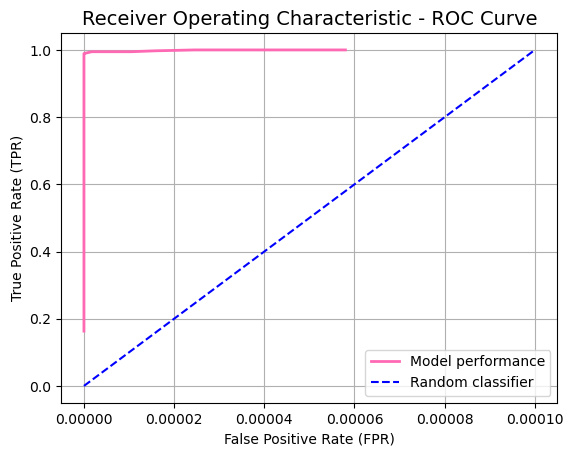

In [76]:
import matplotlib.pyplot as plt

lst = []
fpr_list1 = []
fpr_list = []
tpr_list = []
tpr_list1 = []

# Read the file
with open('final.txt', 'r') as file:
    for line in file:
        lst.append(line.strip().split("["))

# Extract fpr_list and tpr_list
for i in range(len(lst)):
    fpr_list1 = lst[0][1].split(",")
    tpr_list1 = lst[1][1].split(",")

# Remove the last element from the lists
fpr_list1.pop(-1)
tpr_list1.pop(-1)

# Convert the elements to floats and store in fpr_list and tpr_list
for el in fpr_list1:
    fpr_list.append(float(el))
for element in tpr_list1:
    tpr_list.append(float(element))


# Plot the ROC curve

plt.title("Receiver Operating Characteristic - ROC Curve", fontsize=14)
plt.plot(fpr_list, tpr_list, color='hotpink', linewidth=2, label='Model performance')
plt.plot([0, 1e-4], [0, 1], linestyle='--', color='blue', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.legend()
plt.show()


This model is a perfect classifier with ROC-AUC score of 1.